In [1]:
!pip3 install openai

In [2]:
!pip3 install tiktoken

In [28]:
import os
import openai
import tiktoken
import time

In [6]:
os.environ['OPENAI_API_KEY'] = "aaaa"

In [7]:
openai.organization = 'bbbb'
openai.api_key = os.getenv("OPENAI_API_KEY")

In [8]:
openai.Model.list()

<OpenAIObject list at 0x7f2bc50f1270> JSON: {
  "object": "list",
  "data": [
    {
      "id": "text-davinci-001",
      "object": "model",
      "created": 1649364042,
      "owned_by": "openai",
      "permission": [
        {
          "id": "modelperm-CDlahk1RbkghXDjtxqzXoPNo",
          "object": "model_permission",
          "created": 1690913868,
          "allow_create_engine": false,
          "allow_sampling": true,
          "allow_logprobs": true,
          "allow_search_indices": false,
          "allow_view": true,
          "allow_fine_tuning": false,
          "organization": "*",
          "group": null,
          "is_blocking": false
        }
      ],
      "root": "text-davinci-001",
      "parent": null
    },
    {
      "id": "text-search-curie-query-001",
      "object": "model",
      "created": 1651172509,
      "owned_by": "openai-dev",
      "permission": [
        {
          "id": "modelperm-fNgpMH6ZEQulSq1CjzlfQuIe",
          "object": "model_permission

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("/home/chris/Documents/Kaggle/DisneylandReviews.csv", encoding='latin-1')
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [11]:
df.shape

(42656, 6)

In [12]:
df.Rating.value_counts()

5    23146
4    10775
3     5109
2     2127
1     1499
Name: Rating, dtype: int64

In [13]:
df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [14]:
from openai.embeddings_utils import get_embedding, cosine_similarity

In [15]:
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"
max_tokens = 8000 

In [16]:
encoding = tiktoken.get_encoding(embedding_encoding)

In [17]:
dir(encoding)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_core_bpe',
 '_encode_bytes',
 '_encode_only_native_bpe',
 '_encode_single_piece',
 '_mergeable_ranks',
 '_pat_str',
 '_special_tokens',
 'decode',
 'decode_batch',
 'decode_bytes',
 'decode_bytes_batch',
 'decode_single_token_bytes',
 'decode_tokens_bytes',
 'encode',
 'encode_batch',
 'encode_ordinary',
 'encode_ordinary_batch',
 'encode_single_token',
 'encode_with_unstable',
 'eot_token',
 'max_token_value',
 'n_vocab',
 'name',
 'special_tokens_set',
 'token_byte_values']

In [18]:
df["n_tokens"] = df.Review_Text.apply(lambda x: len(encoding.encode(x)))
df = df[df.n_tokens <= max_tokens].tail(1000)
len(df)

1000

In [19]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,n_tokens
41656,121634197,5,2011-11,United Kingdom,This was the first time that she has been to E...,Disneyland_Paris,40
41657,121620684,5,2011-11,United Kingdom,I went to Disneyland Paris with my 6 year old ...,Disneyland_Paris,601
41658,121592033,4,2011-11,United Kingdom,"Good fun!We did Walt Disney studios as well, a...",Disneyland_Paris,61
41659,121591737,3,2011-12,United Kingdom,Arrived at the resort on 5th December 2011 sta...,Disneyland_Paris,651
41660,121579949,5,2011-8,Australia,Just loved the set up of disneyland.I thought ...,Disneyland_Paris,37


In [20]:
df["embedding"] = df.Review_Text.apply(lambda x: get_embedding(x, engine=embedding_model))
#df.to_csv("../Model/Model_embedding.csv")

In [21]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [22]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,n_tokens,embedding
41656,121634197,5,2011-11,United Kingdom,This was the first time that she has been to E...,Disneyland_Paris,40,"[0.001851606066338718, -0.011699815280735493, ..."
41657,121620684,5,2011-11,United Kingdom,I went to Disneyland Paris with my 6 year old ...,Disneyland_Paris,601,"[0.006795619148761034, 0.003492922056466341, -..."
41658,121592033,4,2011-11,United Kingdom,"Good fun!We did Walt Disney studios as well, a...",Disneyland_Paris,61,"[-0.001104546943679452, -0.006857291795313358,..."
41659,121591737,3,2011-12,United Kingdom,Arrived at the resort on 5th December 2011 sta...,Disneyland_Paris,651,"[-0.0028349917847663164, -0.001031603082083165..."
41660,121579949,5,2011-8,Australia,Just loved the set up of disneyland.I thought ...,Disneyland_Paris,37,"[-0.011280816979706287, -0.0013862717896699905..."


In [23]:
matrix = np.array(df.embedding.tolist())

In [24]:
n_clusters = 5

In [25]:
kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)

KMeans(n_clusters=5, random_state=42)

In [26]:
labels = kmeans.labels_
df["Cluster"] = labels 

In [27]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,n_tokens,embedding,Cluster
41656,121634197,5,2011-11,United Kingdom,This was the first time that she has been to E...,Disneyland_Paris,40,"[0.001851606066338718, -0.011699815280735493, ...",3
41657,121620684,5,2011-11,United Kingdom,I went to Disneyland Paris with my 6 year old ...,Disneyland_Paris,601,"[0.006795619148761034, 0.003492922056466341, -...",0
41658,121592033,4,2011-11,United Kingdom,"Good fun!We did Walt Disney studios as well, a...",Disneyland_Paris,61,"[-0.001104546943679452, -0.006857291795313358,...",3
41659,121591737,3,2011-12,United Kingdom,Arrived at the resort on 5th December 2011 sta...,Disneyland_Paris,651,"[-0.0028349917847663164, -0.001031603082083165...",1
41660,121579949,5,2011-8,Australia,Just loved the set up of disneyland.I thought ...,Disneyland_Paris,37,"[-0.011280816979706287, -0.0013862717896699905...",3


In [29]:
tsne = TSNE(n_components=2, perplexity=15, random_state=11, init='random', learning_rate=200) 

In [30]:
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(1000, 2)

In [31]:
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

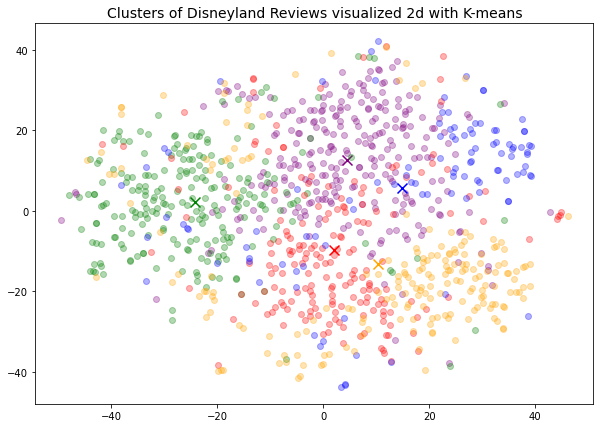

In [33]:
fig, ax = plt.subplots(figsize=(10, 7))
for category, color in enumerate(["purple", "green", "red", "blue", "orange"]):
    xs = np.array(x)[df.Cluster == category]
    ys = np.array(y)[df.Cluster == category]
    ax.scatter(xs, ys, color=color, alpha=0.3)
    avg_x = xs.mean()
    avg_y = ys.mean()
    ax.scatter(avg_x, avg_y, marker="x", color=color, s=100)

ax.set_title("Clusters of Disneyland Reviews visualized 2d with K-means", fontsize=14)
plt.show()

In [72]:
rev_per_cluster = 3
for i in range(n_clusters):
    print(f"Cluster {i} Theme:", end=" ")

    reviews = "\n".join(
        df[df.Cluster == i]
        .Review_Text.str.replace("Title: ", "")
        .str.replace("\n\nContent: ", ":  ")
        .sample(rev_per_cluster, random_state=42)
        .values
    )
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=f'What do the following customer reviews have in common?\n\nCustomer reviews:\n"""\n{reviews}\n"""\n\nTheme:',
        temperature=0,
        max_tokens=64,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
    )
    print(response["choices"][0]["text"].replace("\n", ""))

    sample_cluster_rows = df[df.Cluster == i].sample(rev_per_cluster, random_state=42)
    for j in range(rev_per_cluster):
        print(sample_cluster_rows.Score.values[j], end=", ")
        print(sample_cluster_rows.Summary.values[j], end=":   ")
        print(sample_cluster_rows.Text.str[:70].values[j])

    print("-" * 100)

Cluster 0 Theme:  The customer reviews all express dissatisfaction with their experience at Disney. They mention issues such as poor customer service, lack of amenities, uncleanliness, and high prices.


AttributeError: 'DataFrame' object has no attribute 'Score'

<h1>Profissoes</h1>